# DSCI 100 Final Group Project Report: Joanne, Jaslyne, Maisha & William 
## Can the start time predict the playing session length in sessions.csv?

## **Introduction**

## **Method & Results**

### Loading Libraries

In [37]:
library(tidyverse)
library(repr)
library(tidymodels)
library(lubridate)
library(hms)

### Loading Data

In [38]:
session_data <- read_csv("https://raw.githubusercontent.com/jaslynemarek/DSCI-Project-Individual/refs/heads/main/sessions.csv")
head(session_data)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


### Data Wrangling

In [39]:
session_data_dmyhm <- session_data |>
                    mutate(start_time = dmy_hm(start_time),
                    end_time = dmy_hm(end_time))
head(session_data_dmyhm)

session_data_mutated <- mutate(session_data_dmyhm, session_time = end_time - start_time,
                              start_time_hms = as_hms(start_time),
                              session_time = as.numeric(session_time),
                              start_time_numeric = as.numeric(start_time_hms))
head(session_data_mutated)

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<dttm>,<dttm>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,2024-05-25 16:12:00,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,2024-06-23 17:10:00,1.71916e+12,1.71916e+12


hashedEmail,start_time,end_time,original_start_time,original_end_time,session_time,start_time_hms,start_time_numeric
<chr>,<dttm>,<dttm>,<dbl>,<dbl>,<dbl>,<time>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30 18:12:00,2024-06-30 18:24:00,1.71977e+12,1.71977e+12,12,18:12:00,65520
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17 23:33:00,2024-06-17 23:46:00,1.71867e+12,1.71867e+12,13,23:33:00,84780
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25 17:34:00,2024-07-25 17:57:00,1.72193e+12,1.72193e+12,23,17:34:00,63240
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-07-25 03:22:00,2024-07-25 03:58:00,1.72188e+12,1.72188e+12,36,03:22:00,12120
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-25 16:01:00,2024-05-25 16:12:00,1.71665e+12,1.71665e+12,11,16:01:00,57660
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-23 15:08:00,2024-06-23 17:10:00,1.71916e+12,1.71916e+12,122,15:08:00,54480


### Visualization

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


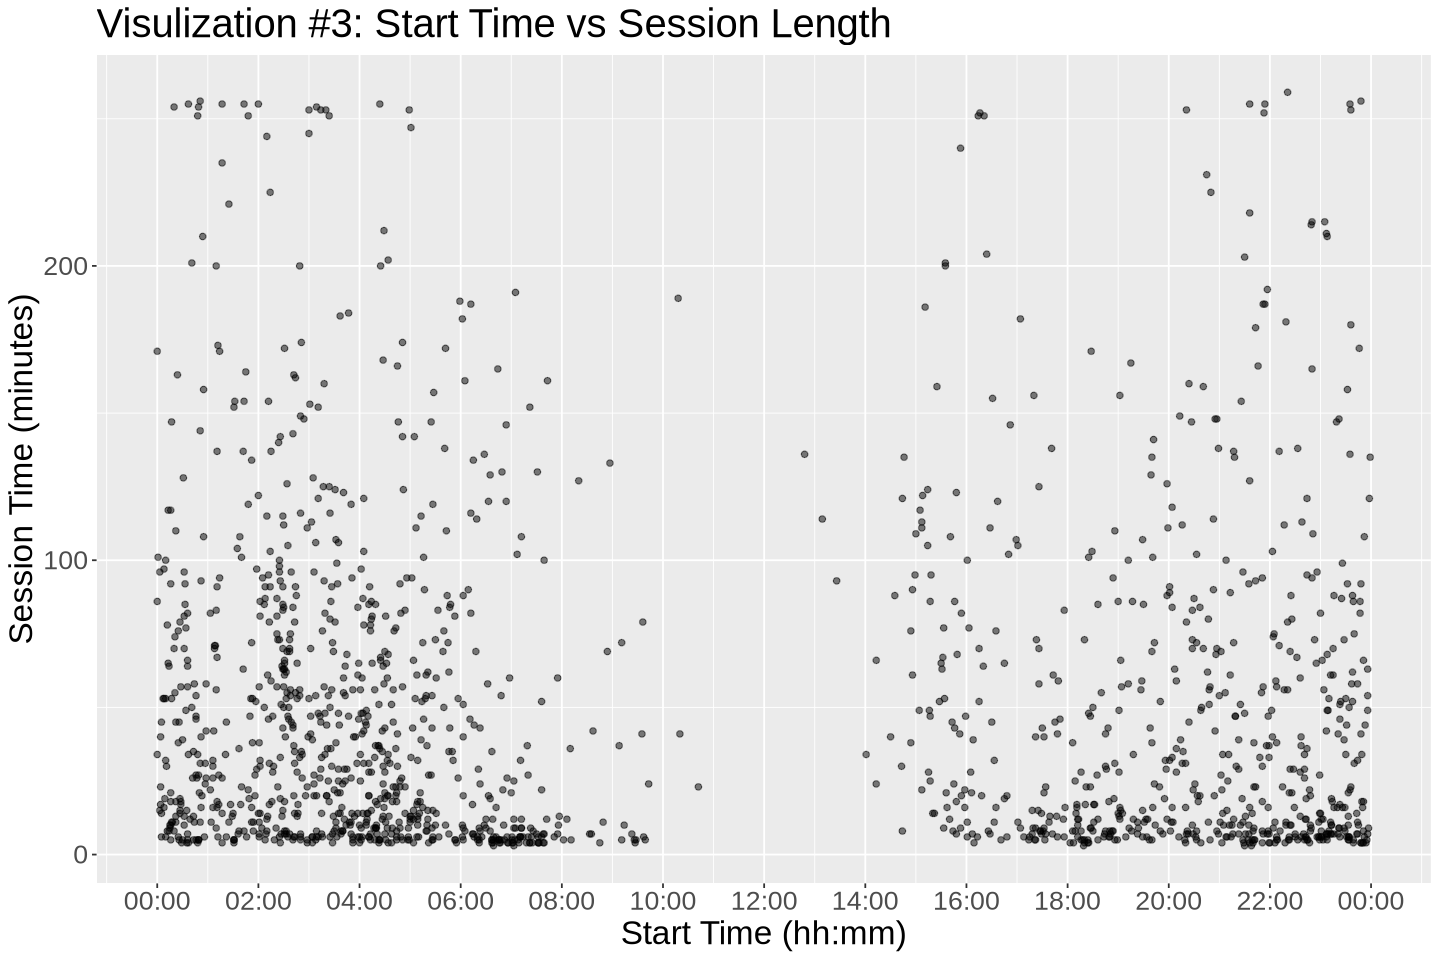

In [40]:
options(repr.plot.width = 12, repr.plot.height = 8)
time_plot <- ggplot(session_data_mutated, aes(x = start_time_hms, y = session_time))+
            geom_point(alpha = 0.5)+
            xlab("Start Time (hh:mm)")+
            ylab("Session Time (minutes)")+
            ggtitle("Visulization #3: Start Time vs Session Length")+
            theme(text = element_text(size = 20))+
            scale_x_time(breaks = seq(0,24*3600, by = 2*3600), labels = scales::time_format("%H:%M"))
time_plot

### Data Analysis

In [41]:
session_split <- initial_split(session_data_mutated, prop = 0.75, strata = session_time)
session_train <- training(session_split)
session_test <- testing(session_split)

In [42]:
minecraft_recipe <- recipe(session_time ~ start_time_numeric, data = session_train) |>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())

minecraft_spec <- nearest_neighbor(weight_func = "rectangular",
                                                   neighbors = tune())|>
                set_engine("kknn")|>
                set_mode("regression")

minecraft_vfold <- vfold_cv(session_train, v = 5, strata = session_time)

minecraft_workflow <- workflow() |>
                        add_recipe(minecraft_recipe)|>
                        add_model(minecraft_spec)
minecraft_workflow

══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [43]:
gridvals <- tibble(neighbors = seq(from = 1, to = 300, by = 2))

sessions_results <- minecraft_workflow |>
                tune_grid(resamples = minecraft_vfold, grid = gridvals)|>
                collect_metrics()|>
                filter(.metric == "rmse")

head(sessions_results)

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,72.91708,5,3.366595,Preprocessor1_Model001
3,rmse,standard,60.31547,5,2.689541,Preprocessor1_Model002
5,rmse,standard,57.95062,5,2.440568,Preprocessor1_Model003
7,rmse,standard,57.14184,5,2.527068,Preprocessor1_Model004
9,rmse,standard,56.61952,5,2.419929,Preprocessor1_Model005
11,rmse,standard,56.64981,5,2.367591,Preprocessor1_Model006


In [44]:
sessions_min <- sacr_results |>
            filter(mean == min(mean))
sessions_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
81,rmse,standard,55.00051,5,2.036116,Preprocessor1_Model041


In [45]:
kmin <- sacr_min |> pull(neighbors)

sessions_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = kmin) |>
                set_engine("kknn") |>
                set_mode("regression")

sessions_fit <- workflow()|>
                add_recipe(minecraft_recipe) |>
                add_model(sessions_spec) |>
                fit(data = session_train)

sessions_summary <- sessions_fit |>
                    predict(session_test) |>
                    bind_cols(session_test) |>
                    metrics(truth = session_time, estimate = .pred)|>
                    filter(.metric == 'rmse')
sessions_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,56.57501


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


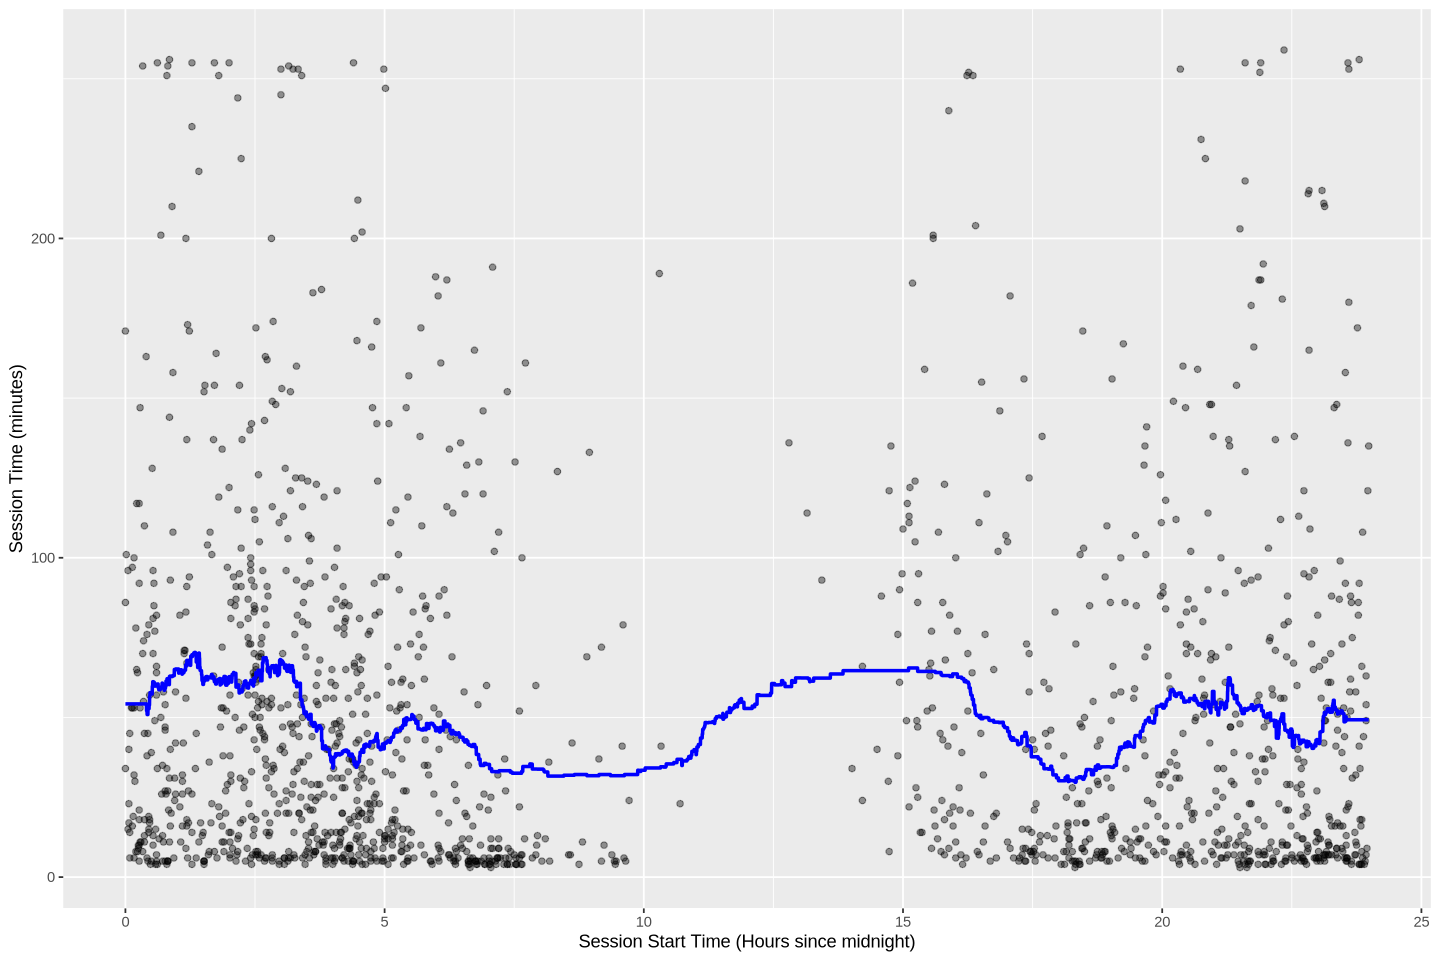

In [50]:
minecraft_prediction_grid <- tibble(start_time_numeric = seq(
                                from = min(pull(session_data_mutated, start_time_numeric)),
                                to = max(pull(session_data_mutated, start_time_numeric)),
                                by = 10))

session_preds <- sessions_fit |>
                    predict(minecraft_prediction_grid)|>
                    bind_cols(minecraft_prediction_grid)

plot_final <- ggplot(session_data_mutated, aes( x = start_time_numeric/3600, y = session_time))+
                geom_point(alpha = 0.4)+
                geom_line(data = session_preds,
                          mapping = aes( x = start_time_numeric/3600, y = .pred),
                          color = "blue",
                          linewidth = 1)+
                xlab("Session Start Time (Hours since midnight)")+
                ylab("Session Time (minutes)")
plot_final

## **Discussion**

## **References**